# 13 Event studies

### 2024/4/16  赵吕宇佳、王梦涵、李子明
### 分工情况：各自完成代码，一起讨论解决遇到的问题 

在前几章中，我们研究了探讨金融市场对信息反应的论文。第十章讨论了Fama等人（1969年）考察了股票分割信息对价格的调整。第十一章考察了Ball和Brown（1968年）的研究，显示市场在一年中的回报与该期间的盈利新闻相关。第十二章研究了Beaver（1968年）的工作，表明围绕盈利公告时，交易量和价格波动性会增加。

自那些早期论文以来，研究者研究市场对信息反应的方式已经发生了显著的演变，本章将介绍当前事件研究方法的基础。

## 13.1 Overview


（1）MacKinlay 在1997年的研究中定义事件研究为使用金融市场数据“测量特定事件对公司价值的影响”。这种研究的有用性来源于这样一个事实：假设市场高度有效，事件的效应将立即反映在证券价格上。因此，可以利用在相对较短时间内观察到的证券价格来构建事件的经济影响的度量。

MacKinlay继续指出，在20世纪60年代末，Ray Ball 和 Philip Brown（1968年）以及 Eugene Fama 等人（1969年）的开创性研究引入了今天基本上仍在使用的方法论。Ball 和 Brown 研究了盈利的信息内容，而 Fama 等人研究了在剔除同时增加股息的影响后股票分割的效应。

（2）实践研究考察一类可识别时间对于一个或多个经济收益变量的影响。在资本市场的研究中，经济收益的变量通常是事件发生前后股票收益的回报

（3）事件研究的基本要素包括：

事件类别：如盈利公告、合并公告、股票分割、盈利预测变化。在许多研究论文中，这些事件代表了关注的处理。
研究关注的变量：如会计政策、市场回报率、交易量等。
对照观察：未发生事件的观察。
控制变量：可能与事件相关联的其他变量，如与盈利公告或预测修正以及回报相关的股息公告

### 13.1.1 Discussion questions

#### 1.Does Ball and Brown (1968) meet the MacKinlay (1997) definition of an event study? What features are present and what, if any, are missing?

#### 2.Does Beaver (1968) meet the MacKinlay (1997) definition of an event study? What features are present and what, if any, are missing?

Ball and Brown (1968)
这项研究主要关注了盈利公告对股票价格的影响。它符合事件研究的基本框架，因为它分析了特定事件（盈利公告）对一个经济变量（股票价格）的影响。这项研究强调了市场是如何反应盈利信息的。

Beaver (1968)
Beaver的研究探讨了盈利公告对股票交易量和价格波动性的影响。这也符合事件研究的定义，因为它研究了一个可识别事件对重要经济变量（价格波动性和交易量）的影响。

## 13.2 The modern event study

随着时间的推移，事件研究方法已经发生了演变。尽管当今的事件研究通常符合MacKinlay (1997)的定义，但随着应用范围的扩大，事件研究方法已经发生了变化。

一个变化是，研究人员开始更多地使用事件研究来理解监管的经济效应，而不仅仅是市场对公司特定公告的反应。Fama等人（1969）研究了股票分割，Beaver（1968）研究了盈利公告。在这些案例中，事件都是公司层面的，相互之间基本独立（例如，它们在时间上不会过度集中）。相比之下，我们下面研究的三个较新的事件研究都使用了监管事件，例如影响立法可能性的事件（Larcker等人，2011；Zhang，2007）或会计准则生效的事件（Khan等人，2017）。

另一个相关的变化是对市场效率的依赖增加了，典型的现代事件研究使用（用MacKinlay的话说）“在相对较短时间内观察到的证券价格”作为“事件经济影响的度量”。Fama等人（1969）和Beaver（1968）在确定市场似乎对股票分割和盈利公告作出反应时，并没有过多依赖市场效率，这两项研究也都不试图证明股票分割或盈利公告是否创造（或破坏）了价值。相比之下，现代事件研究往往依赖于市场效率来评估监管。例如，使用事件研究来问“FASB的标准是否增加了股东价值？”（Khan等人，2017）严重依赖于市场对此类强效市场效率含义的了解。

这种重点转变的一个后果是，研究人员常常可以使用的独立观察数据较少。例如，Zhang（2007）的主要分析关注四个事件窗口，远少于Beaver（1968）的506个盈利公告。正如我们将看到的，研究人员经常使用补充分析来解决数据相对匮乏的问题。

### 13.2.1 A small event study

为了更好地理解现代事件研究，我们将进行一项小型研究。假设我们希望更好地了解苹果公司的价值创造过程，特别关注苹果的产品开发过程。在撰写本文时（2022年中），苹果是世界上市值最高的公司，市值超过2万亿美元，因此了解其如何为股东创造价值对研究人员具有吸引力。

由于苹果对其产品管道保密性极高，其产品发布的媒体事件备受关注。例如，在2007年1月9日的Macworld Conference & Expo San Francisco上，苹果宣布了iPhone，后来成为苹果的主要收入来源和世界上最大的手机产品之一。在2010年1月27日的苹果特别活动上，苹果宣布了iPad，苹果的平板电脑。

因此，为了了解苹果的产品是否为苹果股东创造价值，我们可以利用苹果的媒体事件作为感兴趣的事件进行事件研究

#### 数据准备 

In [1]:
# 标准库导入
import os
import re
from datetime import datetime
from zipfile import ZipFile

# 第三方库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import sqlite3
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from statsmodels.regression.linear_model import OLS
from plotnine import (ggplot, aes, geom_point, geom_line, geom_ribbon,
                      geom_smooth, labs, theme)

# 设置工作目录
Main_Folder = r'C:\Users\ZHAO LVYUJIA\04_event_study'
os.chdir(f'{Main_Folder}')


In [2]:
from sqlalchemy import create_engine
import psycopg2

con = psycopg2.connect(dbname='wrds', 
                        user='sam0302', 
                        password = 'Friedfish825#6',
                        host='wrds-pgdata.wharton.upenn.edu', 
                        port=9737)
# 创建连接引擎
wrds = create_engine('postgresql+psycopg2://', creator=lambda: con)

OperationalError: connection to server at "wrds-pgdata.wharton.upenn.edu" (165.123.60.118), port 9737 failed: SSL connection has been closed unexpectedly


In [3]:
## 检查数据库有什么表
event_study= sqlite3.connect(database='04_event_study.sqlite')
event_study.execute('SELECT name FROM sqlite_master').fetchall()

[('stocknames',), ('dsf',), ('dsi',), ('idx_daily',)]

#### stocknames：
(1)通常包含股票的名称信息，以及其他标识信息，如股票代码（permno）、开始日期（namedt）和结束日期（nameenddt）。这些信息帮助识别和追踪不同时间段内特定股票的身份。
(2)用于关联股票交易数据和股票的基本信息，以进行股票历史查询和数据完整性校验。
#### dsf（Daily Stock File）：
(1)包含股票的日度交易数据，可能包括价格、交易量、调整后的收盘价等字段。permno作为股票的唯一标识符。
(2)用于进行股票的日度分析，比如计算收益率、波动性等金融指标。
#### dsi（Daily Stock Index）：
(1)包含有关股票市场指数的日度数据。例如，可以包括指数的日收盘价、开盘价等信息。
(1)用于分析市场整体表现，与个别股票表现进行比较，或作为市场基准进行各种金融模型的建立。
#### idx_daily：
(1)通常包含关于各种指数的日常数据，类似于dsi，但可能更加全面或专注于不同类型的指数，如行业指数、商品指数等。
(2)用途：用于进行更广泛的市场分析，帮助投资者和分析师了解不同市场部门或资产类别的表现。

In [4]:
stocknames = pd.read_sql_query(sql='SELECT * FROM stocknames',
                               con=event_study,
                               dtype={"permno": str}, 
                               parse_dates={'namedt','nameenddt'})
dsf = pd.read_sql_query(sql='SELECT * FROM dsf',
                        con=event_study, 
                        dtype={"permno": str},
                        parse_dates={'date'})
dsi = pd.read_sql_query(sql='SELECT * FROM dsi',
                        con=event_study, 
                        parse_dates={'date'})
idx_daily=pd.read_sql_query(sql='SELECT * FROM idx_daily',
                        con=event_study, 
                        parse_dates={'datadate'})

In [5]:
stocknames 

,ticker,exchcd,permno,namedt,nameenddt,shrcd
0,OMFGA,3,10000,1986-01-07,1987-06-11,10
1,GFGC,3,10001,1986-01-09,1993-11-21,11
2,EWST,3,10001,1993-11-22,2008-02-04,11
3,EWST,3,10001,2008-02-05,2009-08-03,11
4,EGAS,3,10001,2009-08-04,2009-12-17,11
...,...,...,...,...,...,...
80785,VLTC,3,93433,2013-04-24,2016-12-22,11
80786,SANW,3,93434,2010-06-14,2023-12-29,11
80787,SCEI,3,93435,2010-06-14,2012-05-18,11
80788,TSLA,3,93436,2010-06-29,2017-02-01,11


In [6]:
dsf 

,date,ret,permno,vol
0,1981-02-25,0.060209,14593,NaN
1,1981-02-26,0.014815,14593,NaN
2,1981-02-27,0.036496,14593,NaN
3,1981-03-02,0.002347,14593,NaN
4,1981-03-03,-0.014052,14593,NaN
...,...,...,...,...
10848,2023-12-22,-0.005548,14593,36702455.0
10849,2023-12-26,-0.002841,14593,28541150.0
10850,2023-12-27,0.000518,14593,47538658.0
10851,2023-12-28,0.002226,14593,33691704.0


In [7]:
dsi 

,date,vwretd,ewretd
0,1925-12-31,NaN,NaN
1,1926-01-02,0.005689,0.009516
2,1926-01-04,0.000706,0.005780
3,1926-01-05,-0.004821,-0.001927
4,1926-01-06,-0.000423,0.001182
...,...,...,...
25794,2023-12-22,0.002440,0.007676
25795,2023-12-26,0.005218,0.009674
25796,2023-12-27,0.001995,0.005276
25797,2023-12-28,-0.000108,0.002042


In [8]:
idx_daily

,gvkeyx,datadate,prccd
0,000193,1984-08-29,3316.120
1,000193,1984-08-30,3314.030
2,000193,1984-08-31,3328.250
3,000193,1984-09-04,3329.290
4,000193,1984-09-05,3297.210
...,...,...,...
9768,000193,2024-04-08,90070.458
9769,000193,2024-04-09,90481.262
9770,000193,2024-04-10,89823.162
9771,000193,2024-04-11,89462.928


#### 查看数据表格apple_events 

In [9]:
apple_events = pd.read_csv("C:/Users/ZHAO LVYUJIA/04_event_study/apple_events.csv")
print(apple_events.tail())

                  event  event_date end_event_date
42  Apple Special Event  2019-12-02     2019-12-02
43            WWDC 2020  2020-06-22     2020-06-26
44  Apple Special Event  2020-09-15     2020-09-15
45  Apple Special Event  2020-10-13     2020-10-13
46  Apple Special Event  2020-11-10     2020-11-10


#### 我们需要从CRSP获取返回数据来进行我们的事件研究。我们首先需要获取苹果的PERMNO，这样我们就可以在CRSP上查找返回数据。知道苹果的股票代码是AAPL有所帮助。

In [10]:
apple_permno = stocknames[stocknames['ticker'] == 'AAPL']['permno'].drop_duplicates().values
apple_permno 

array(['14593'], dtype=object)

### 背景：
#### 考虑到苹果公司的媒体事件往往跨越多天，与我们在第12章研究的盈利公告不同，我们需要将事件窗口设置为更宽的时间范围。这样做的目的是为了允许在媒体事件开始前一天可能发生的信息泄露，以及给市场一些时间来处理媒体事件对公司价值的影响。具体地，我们将事件窗口设定为从每个媒体事件开始前的一个交易日到事件结束后的一天。

### 数据处理：苹果公司股票数据的处理和分析准备工作
#### （1）验证并确定使用的apple_permno，通过内连接合并两个数据集来创建一个新的数据框apple_rets；
#### （2）计算并添加股票相对市场的超额回报，筛选出特定股票和时间段的数据，处理apple_events数据框的日期格式，并为每个产品发布事件计算前后日期以定义事件窗口；
#### （3）最后，它创建了一个新的表格apple_event_dates，包含关键日期和股票标识，用于后续的事件研究分析。

In [11]:
if isinstance(apple_permno, (list, pd.Series, np.ndarray)) and len(apple_permno) > 0:
    apple_permno = apple_permno[0] 
# 使用merge进行内连接
apple_rets = pd.merge(dsf, dsi, on='date', how='inner')

# 创建新列ret_mkt
apple_rets['ret_mkt'] = apple_rets['ret'] - apple_rets['vwretd']

# 选择指定列
apple_rets = apple_rets[['permno', 'date', 'ret', 'ret_mkt', 'vol']]

# 过滤数据
apple_rets = apple_rets[(apple_rets['permno'] == apple_permno) & (apple_rets['date'] >= '2005-01-01')]
apple_events['event_date'] = pd.to_datetime(apple_events['event_date'])
apple_events['end_event_date'] = pd.to_datetime(apple_events['end_event_date'])

# 为每个事件添加permno
apple_events['permno'] = apple_permno  

# 计算事件开始前一天和结束后一天的日期
apple_events['start_date'] = apple_events['event_date'] - pd.Timedelta(days=1)
apple_events['end_date'] = apple_events['end_event_date'] + pd.Timedelta(days=1)

# 新表格命名为 apple_event_dates
apple_event_dates = apple_events[['permno', 'event_date', 'end_event_date', 'start_date', 'end_date']]

In [12]:
apple_rets

,permno,date,ret,ret_mkt,vol
6072,14593,2005-01-03,-0.017236,-0.007202,12442426.0
6073,14593,2005-01-04,0.010270,0.023075,19650028.0
6074,14593,2005-01-05,0.008758,0.014882,12196008.0
6075,14593,2005-01-06,0.000775,-0.002708,12610986.0
6076,14593,2005-01-07,0.072812,0.075029,39944563.0
...,...,...,...,...,...
10848,14593,2023-12-22,-0.005548,-0.007988,36702455.0
10849,14593,2023-12-26,-0.002841,-0.008059,28541150.0
10850,14593,2023-12-27,0.000518,-0.001477,47538658.0
10851,14593,2023-12-28,0.002226,0.002334,33691704.0


In [13]:
print(apple_event_dates.tail())

   permno event_date end_event_date start_date   end_date
42  14593 2019-12-02     2019-12-02 2019-12-01 2019-12-03
43  14593 2020-06-22     2020-06-26 2020-06-21 2020-06-27
44  14593 2020-09-15     2020-09-15 2020-09-14 2020-09-16
45  14593 2020-10-13     2020-10-13 2020-10-12 2020-10-14
46  14593 2020-11-10     2020-11-10 2020-11-09 2020-11-11


现在，我们组织数据的方式可以使我们在图形上以时间为单位描绘苹果的收益，其中包括媒体事件的信息。

In [16]:

# 将日期列转换为datetime格式
apple_rets['date'] = pd.to_datetime(apple_rets['date'])
apple_event_dates['start_date'] = pd.to_datetime(apple_event_dates['start_date'])
apple_event_dates['end_date'] = pd.to_datetime(apple_event_dates['end_date'])

# 复制数据并初始化新列
apple_reg_data = apple_rets.copy()
apple_reg_data['is_event'] = False

# 遍历事件日期数据，标记事件期间
for index, row in apple_event_dates.iterrows():
    condition = (apple_reg_data['date'] >= row['start_date']) & (apple_reg_data['date'] <= row['end_date'])
    apple_reg_data.loc[condition, 'is_event'] = True

# 输出结果
print(apple_reg_data)


      permno       date       ret   ret_mkt         vol  is_event
6072   14593 2005-01-03 -0.017236 -0.007202  12442426.0     False
6073   14593 2005-01-04  0.010270  0.023075  19650028.0     False
6074   14593 2005-01-05  0.008758  0.014882  12196008.0     False
6075   14593 2005-01-06  0.000775 -0.002708  12610986.0     False
6076   14593 2005-01-07  0.072812  0.075029  39944563.0     False
...      ...        ...       ...       ...         ...       ...
10848  14593 2023-12-22 -0.005548 -0.007988  36702455.0     False
10849  14593 2023-12-26 -0.002841 -0.008059  28541150.0     False
10850  14593 2023-12-27  0.000518 -0.001477  47538658.0     False
10851  14593 2023-12-28  0.002226  0.002334  33691704.0     False
10852  14593 2023-12-29 -0.005424 -0.001379  42120662.0     False

[4781 rows x 6 columns]


C:\Users\ZHAO LVYUJIA\AppData\Local\Temp\ipykernel_52912\722835529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ZHAO LVYUJIA\AppData\Local\Temp\ipykernel_52912\722835529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
# 合并数据并标记事件
# apple_reg_data = pd.merge(apple_rets, apple_event_dates, on='permno', how='left', suffixes=('', '_event'))
# apple_reg_data['is_event'] = ~apple_reg_data['start_date'].isna()

# 筛选相关列并按日期排序
# apple_reg_data = apple_reg_data[['permno', 'date', 'ret', 'ret_mkt', 'vol', 'is_event']]
# apple_reg_data.sort_values(by='date', inplace=True)
# apple_reg_data

,permno,date,ret,ret_mkt,vol,is_event
0,14593,2005-01-03,-0.017236,-0.007202,12442426.0,True
26,14593,2005-01-03,-0.017236,-0.007202,12442426.0,True
27,14593,2005-01-03,-0.017236,-0.007202,12442426.0,True
28,14593,2005-01-03,-0.017236,-0.007202,12442426.0,True
29,14593,2005-01-03,-0.017236,-0.007202,12442426.0,True
...,...,...,...,...,...,...
224678,14593,2023-12-29,-0.005424,-0.001379,42120662.0,True
224679,14593,2023-12-29,-0.005424,-0.001379,42120662.0,True
224680,14593,2023-12-29,-0.005424,-0.001379,42120662.0,True
224682,14593,2023-12-29,-0.005424,-0.001379,42120662.0,True


#### 计算累积回报，然后绘制这些回报随时间的变化。

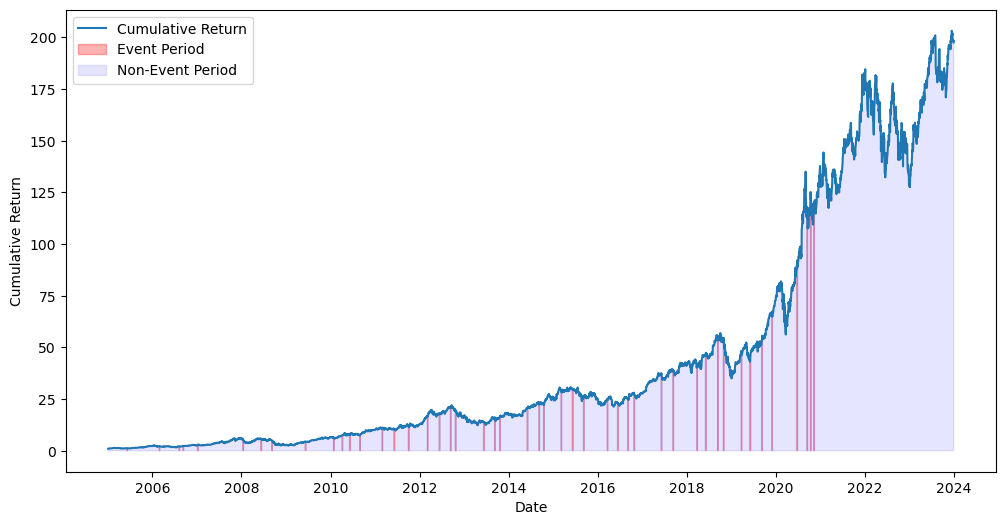

In [18]:
# 计算累积回报率
apple_reg_data['cumret'] = (1 + apple_reg_data['ret'].fillna(0)).cumprod()
apple_reg_data['switch'] = apple_reg_data['is_event'] != apple_reg_data['is_event'].shift(1)

# 画图：全时段累积回报
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(apple_reg_data['date'], apple_reg_data['cumret'], label='Cumulative Return')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=apple_reg_data['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=~apple_reg_data['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()


#### 图13.1中的线代表自窗口开始以来的累积收益。在这条线上添加了两个“区域”图：一个用于非事件窗口，另一个用于事件窗口。绝大多数日期都是非事件日期，这使得图中的事件窗口难以辨别。但是，“放大”可以使事件窗口更容易辨别，如图13.2所示，该图聚焦于2020年第四季度。 

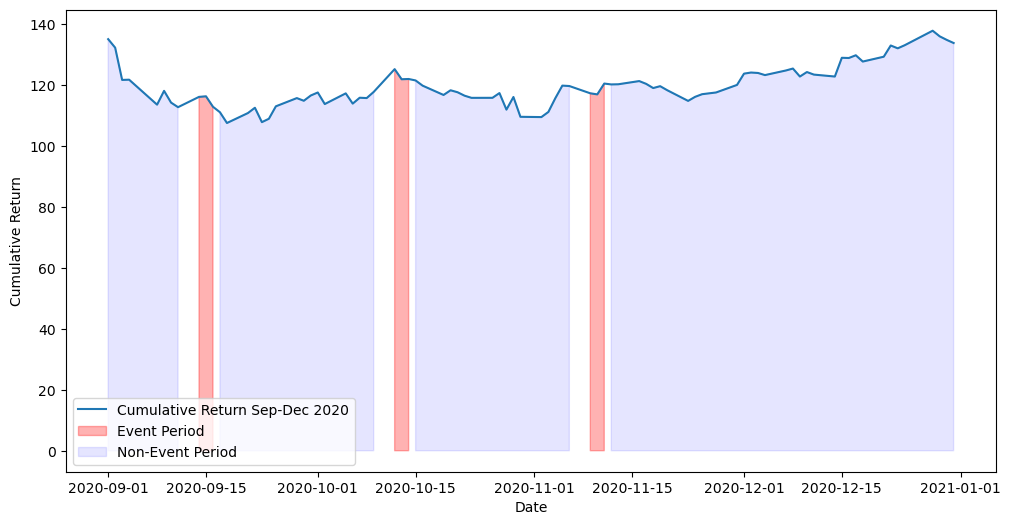

In [19]:
# 画图：2020年9月至12月的累积回报
subset = apple_reg_data[(apple_reg_data['date'] >= '2020-09-01') & (apple_reg_data['date'] <= '2020-12-31')]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(subset['date'], subset['cumret'], label='Cumulative Return Sep-Dec 2020')
ax.fill_between(subset['date'], 0, subset['cumret'], where=subset['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(subset['date'], 0, subset['cumret'], where=~subset['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()


#### 上述图表中很少有迹象表明苹果媒体事件与异常收益有关，但我们将使用回归分析来更正式地测试这一点。我们考虑当指示变量is_event为TRUE时收益是否不同。受Beaver (1968)（第12章）的启发，我们还考虑了收益的绝对值（类似于Beaver (1968)中使用的平方收益残差）和相对交易量。

In [20]:
# 回归分析
model1 = ols('ret_mkt ~ is_event', data=apple_reg_data).fit()
model2 = ols('abs_ret ~ is_event', data=apple_reg_data.assign(abs_ret=np.abs(apple_reg_data['ret']))).fit()
model3 = ols('norm_vol ~ is_event', data=apple_reg_data.assign(norm_vol=apple_reg_data['vol'] / apple_reg_data['vol'].mean())).fit()


print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_mkt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.986
Date:                Tue, 16 Apr 2024   Prob (F-statistic):             0.0145
Time:                        19:18:37   Log-Likelihood:                 13029.
No. Observations:                4781   AIC:                        -2.605e+04
Df Residuals:                    4779   BIC:                        -2.604e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0010      0.000  

#### 这些回归分析（相当随意地解释）提供了较低回报的证据，但没有提供更高（或更低）水平的交易量或回报波动性。

In [21]:
def get_event_cum_rets(data, win_start=-1, win_end=1):
    data['event_window_start'] = data['event_date'] + pd.Timedelta(days=win_start)
    data['event_window_end'] = data['end_event_date'] + pd.Timedelta(days=win_end)
    # 创建一个空的DataFrame来保存结果
    event_cum_rets = []
    for _, row in data.iterrows():
        mask = (apple_rets['date'] >= row['event_window_start']) & (apple_rets['date'] <= row['event_window_end'])
        filtered_rets = apple_rets[mask]
        cum_ret = (1 + filtered_rets['ret_mkt']).prod() - 1
        event_cum_rets.append(cum_ret)
    return pd.Series(event_cum_rets)

# 计算事件窗口的累积回报
apple_event_dates['cum_rets'] = get_event_cum_rets(apple_event_dates)
print(apple_event_dates['cum_rets'].describe())
print((apple_event_dates['cum_rets'] > 0).mean())  # 正回报的比例

count    47.000000
mean     -0.007161
std       0.036832
min      -0.080796
25%      -0.028140
50%      -0.008175
75%       0.011550
max       0.135313
Name: cum_rets, dtype: float64
0.40425531914893614


#### 结论：（1）市场调整后的回报率，平均而言与零几乎没有区别；（2）有多少媒体事件是正回报事件？40% 不到一半！

#### 通过使用上述代码和`get_event_cum_rets()`函数，我们可以深入分析和比较苹果公司产品发布事件期间的股票回报与非事件期间的回报。这种方法的主要目的是为了评估在特定媒体事件窗口内，股票的市场调整回报和规模调整回报，从而识别这些事件是否对股价产生了显著影响。简言之，此分析旨在探究产品发布等重要事件对苹果股价的整体影响，包括事件期间股票回报的表现是否有别于常规期间，这有助于投资者和分析师更好地理解这些公告事件对市场价值的贡献。

#### 最后，我们按事件日期绘制了 Apple 媒体事件经市场调整的回报的散点图

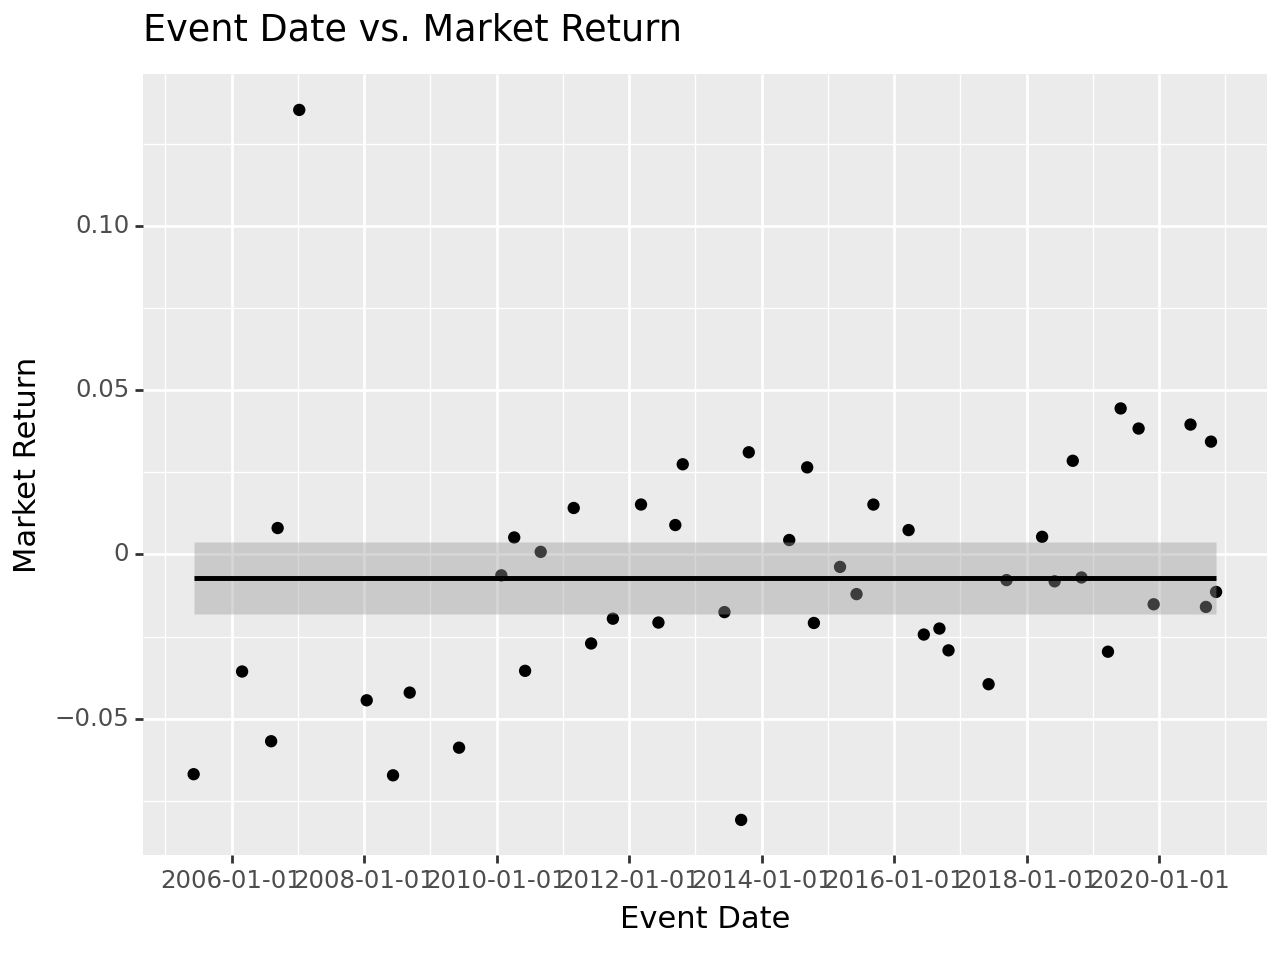

In [22]:
# 散点图
plot = (ggplot(apple_event_dates, aes('event_date', 'cum_rets'))
        + geom_point()
        + geom_smooth(method='lm', formula='y ~ 1')
        + labs(title="Event Date vs. Market Return", x="Event Date", y="Market Return")
       )
print(plot)

这个散点图展示了苹果公司媒体事件日期与市场调整回报之间的关系。横轴是事件日期，覆盖了大约从2006年到2020年的时期，而纵轴代表了每个事件对应的市场调整累计回报。散点代表各个事件的实际回报，而线性回归（由geom_smooth生成的灰色区域）提供了事件日期和市场回报之间关系的视觉概括。线性回归的斜率接近水平，意味着时间推移对市场回报影响不大。散点集中在水平线附近，这可能表明在这些媒体事件发布期间，苹果的市场调整回报并没有显示出明显的长期增长或下降趋势。此外，回报值似乎围绕零上下波动，没有明显的系统性偏差，这表明市场对这些事件的反应各不相同，有时是积极的，有时是消极的。

### 13.2.2 Exercises

#### （1）How would you expect the plot to change if we used cumret = exp(cumsum(log(1 + coalesce(ret, 0)))) in place of cumret = cumprod(1 + coalesce(ret, 0)) in creating the plot above? Is there any reason to prefer one calculation over time other? 

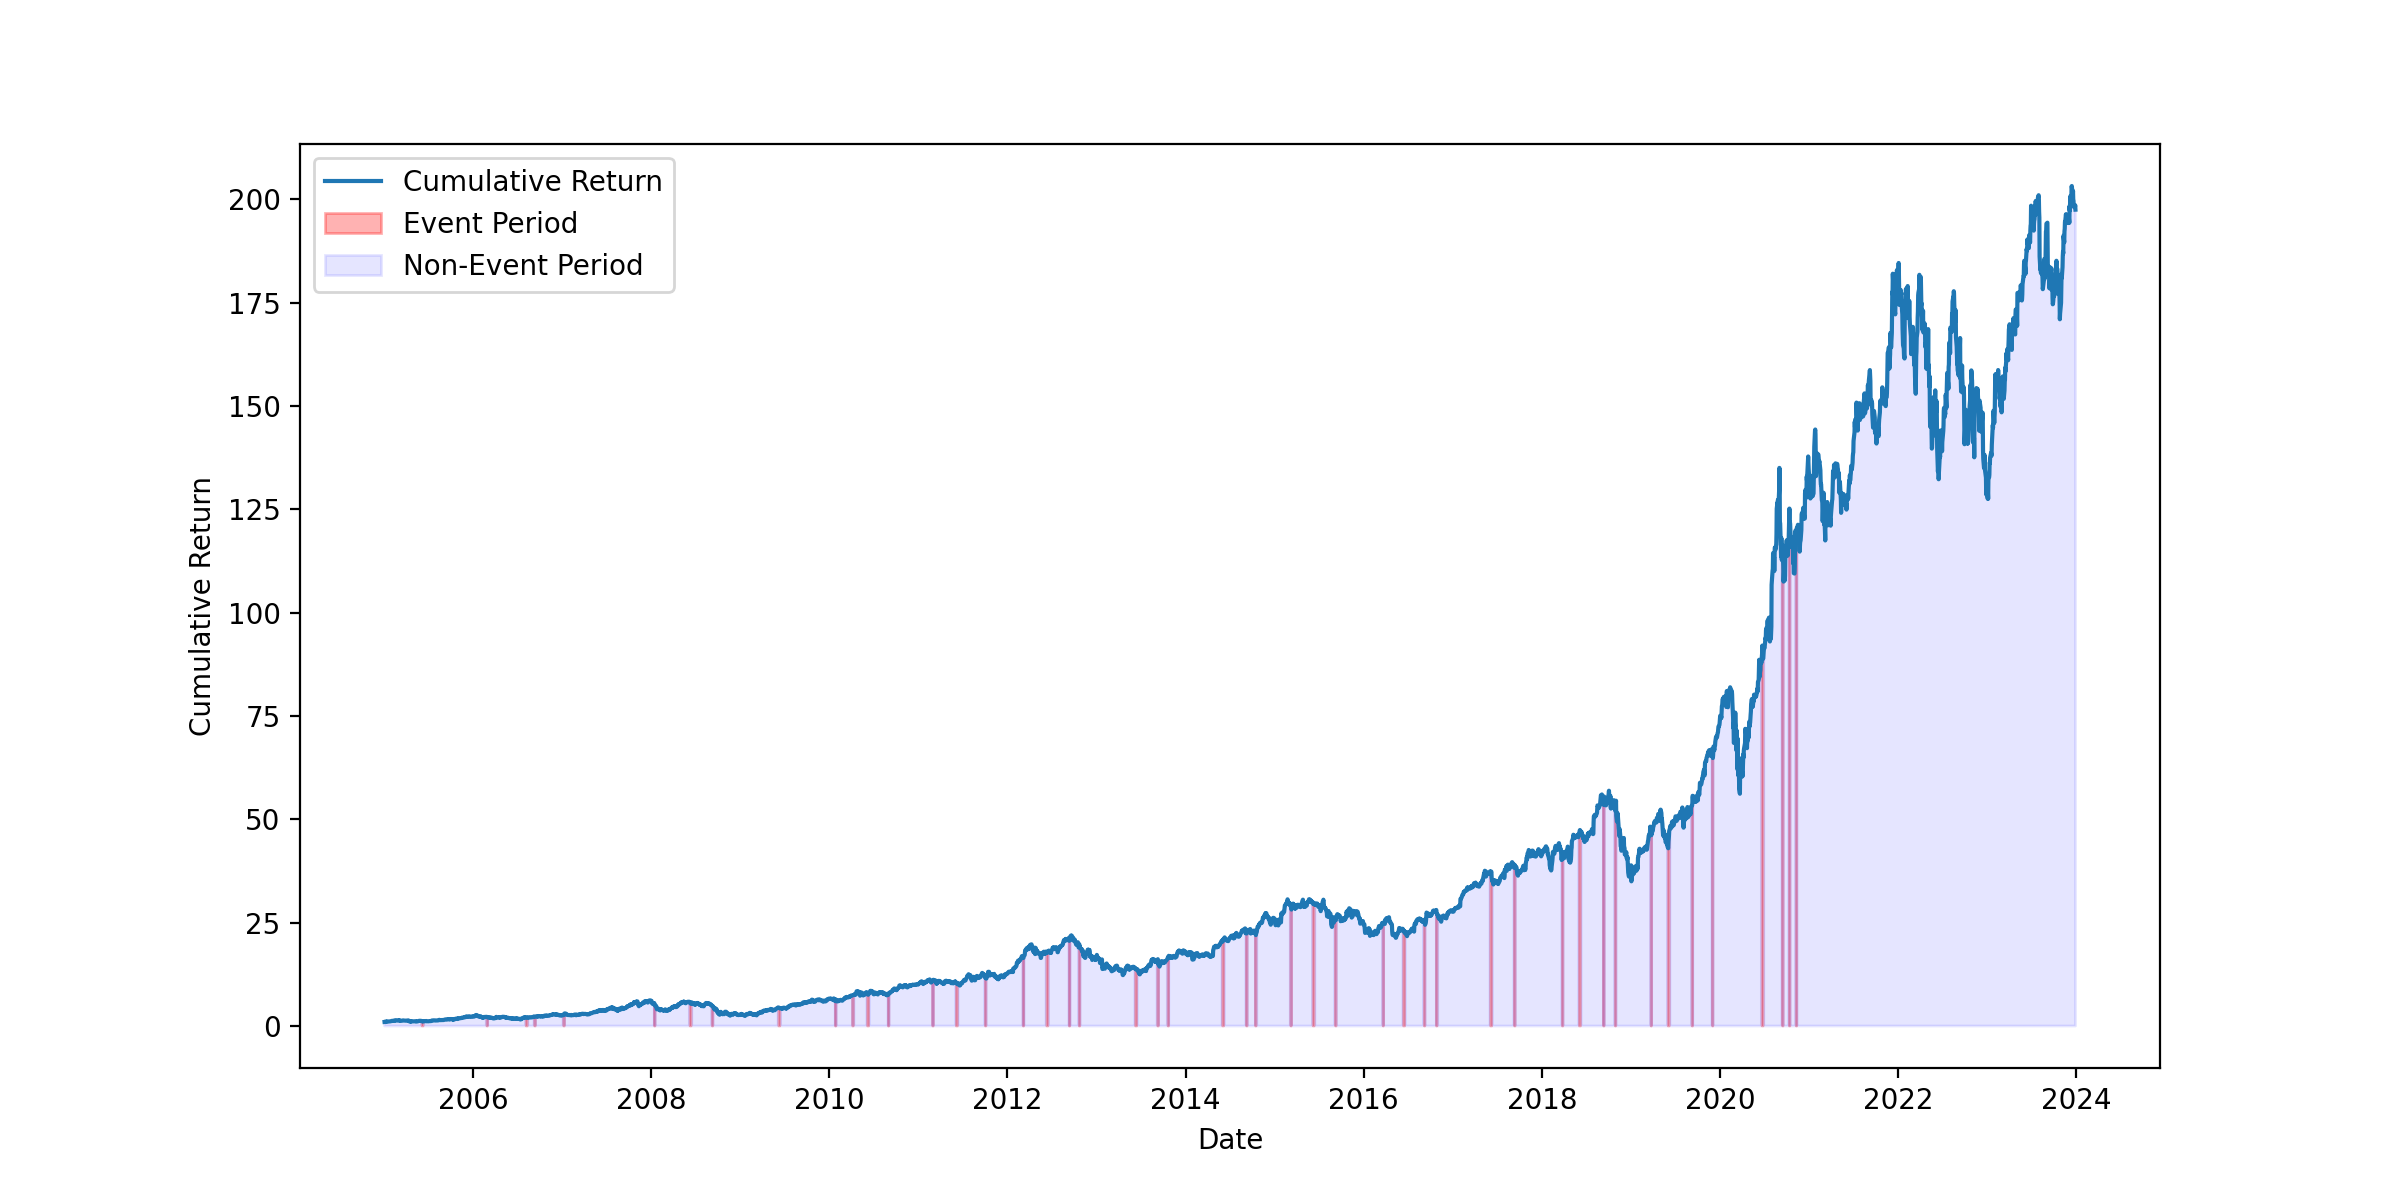

In [23]:

# 计算累积回报率

# 使用对数回报来计算累积回报率
apple_reg_data['cumret'] = np.exp(np.log1p(apple_reg_data['ret'].fillna(0)).cumsum())

apple_reg_data['switch'] = apple_reg_data['is_event'] != apple_reg_data['is_event'].shift(1)

# 画图：全时段累积回报
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(apple_reg_data['date'], apple_reg_data['cumret'], label='Cumulative Return')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=apple_reg_data['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=~apple_reg_data['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()


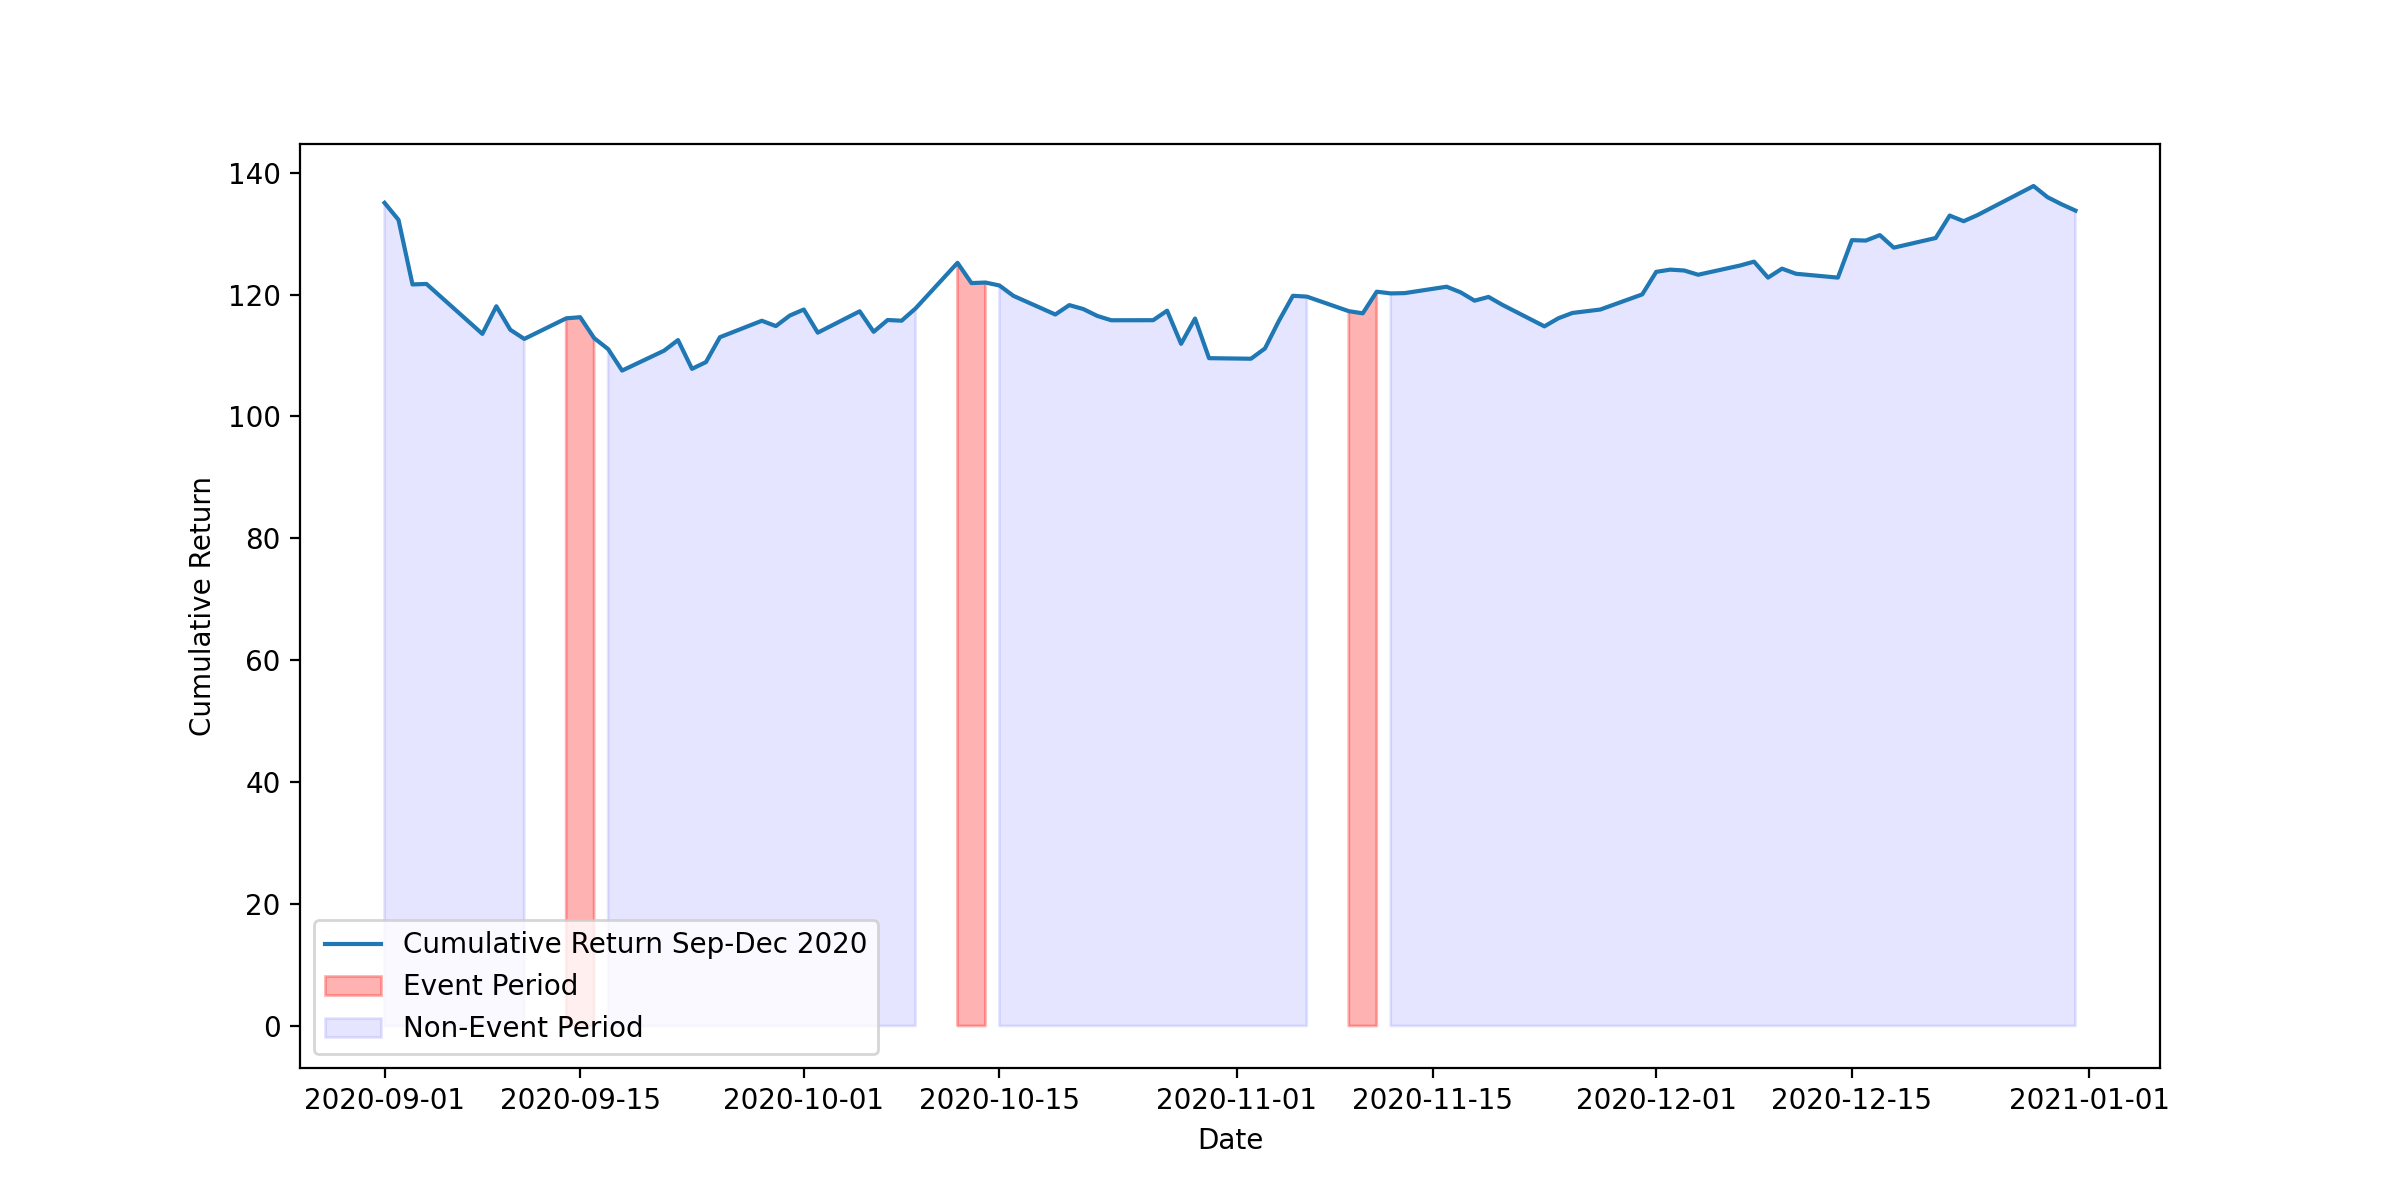

In [24]:
# 画图：2020年9月至12月的累积回报
subset = apple_reg_data[(apple_reg_data['date'] >= '2020-09-01') & (apple_reg_data['date'] <= '2020-12-31')]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(subset['date'], subset['cumret'], label='Cumulative Return Sep-Dec 2020')
ax.fill_between(subset['date'], 0, subset['cumret'], where=subset['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(subset['date'], 0, subset['cumret'], where=~subset['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()


##### （2）Do we get different results in this case if we use cumret = cumprod(1 + ret) (i.e., remove the coalesce() function)? If so, why? If not, would we always expect this to be case (e.g., for stocks other than Apple)?

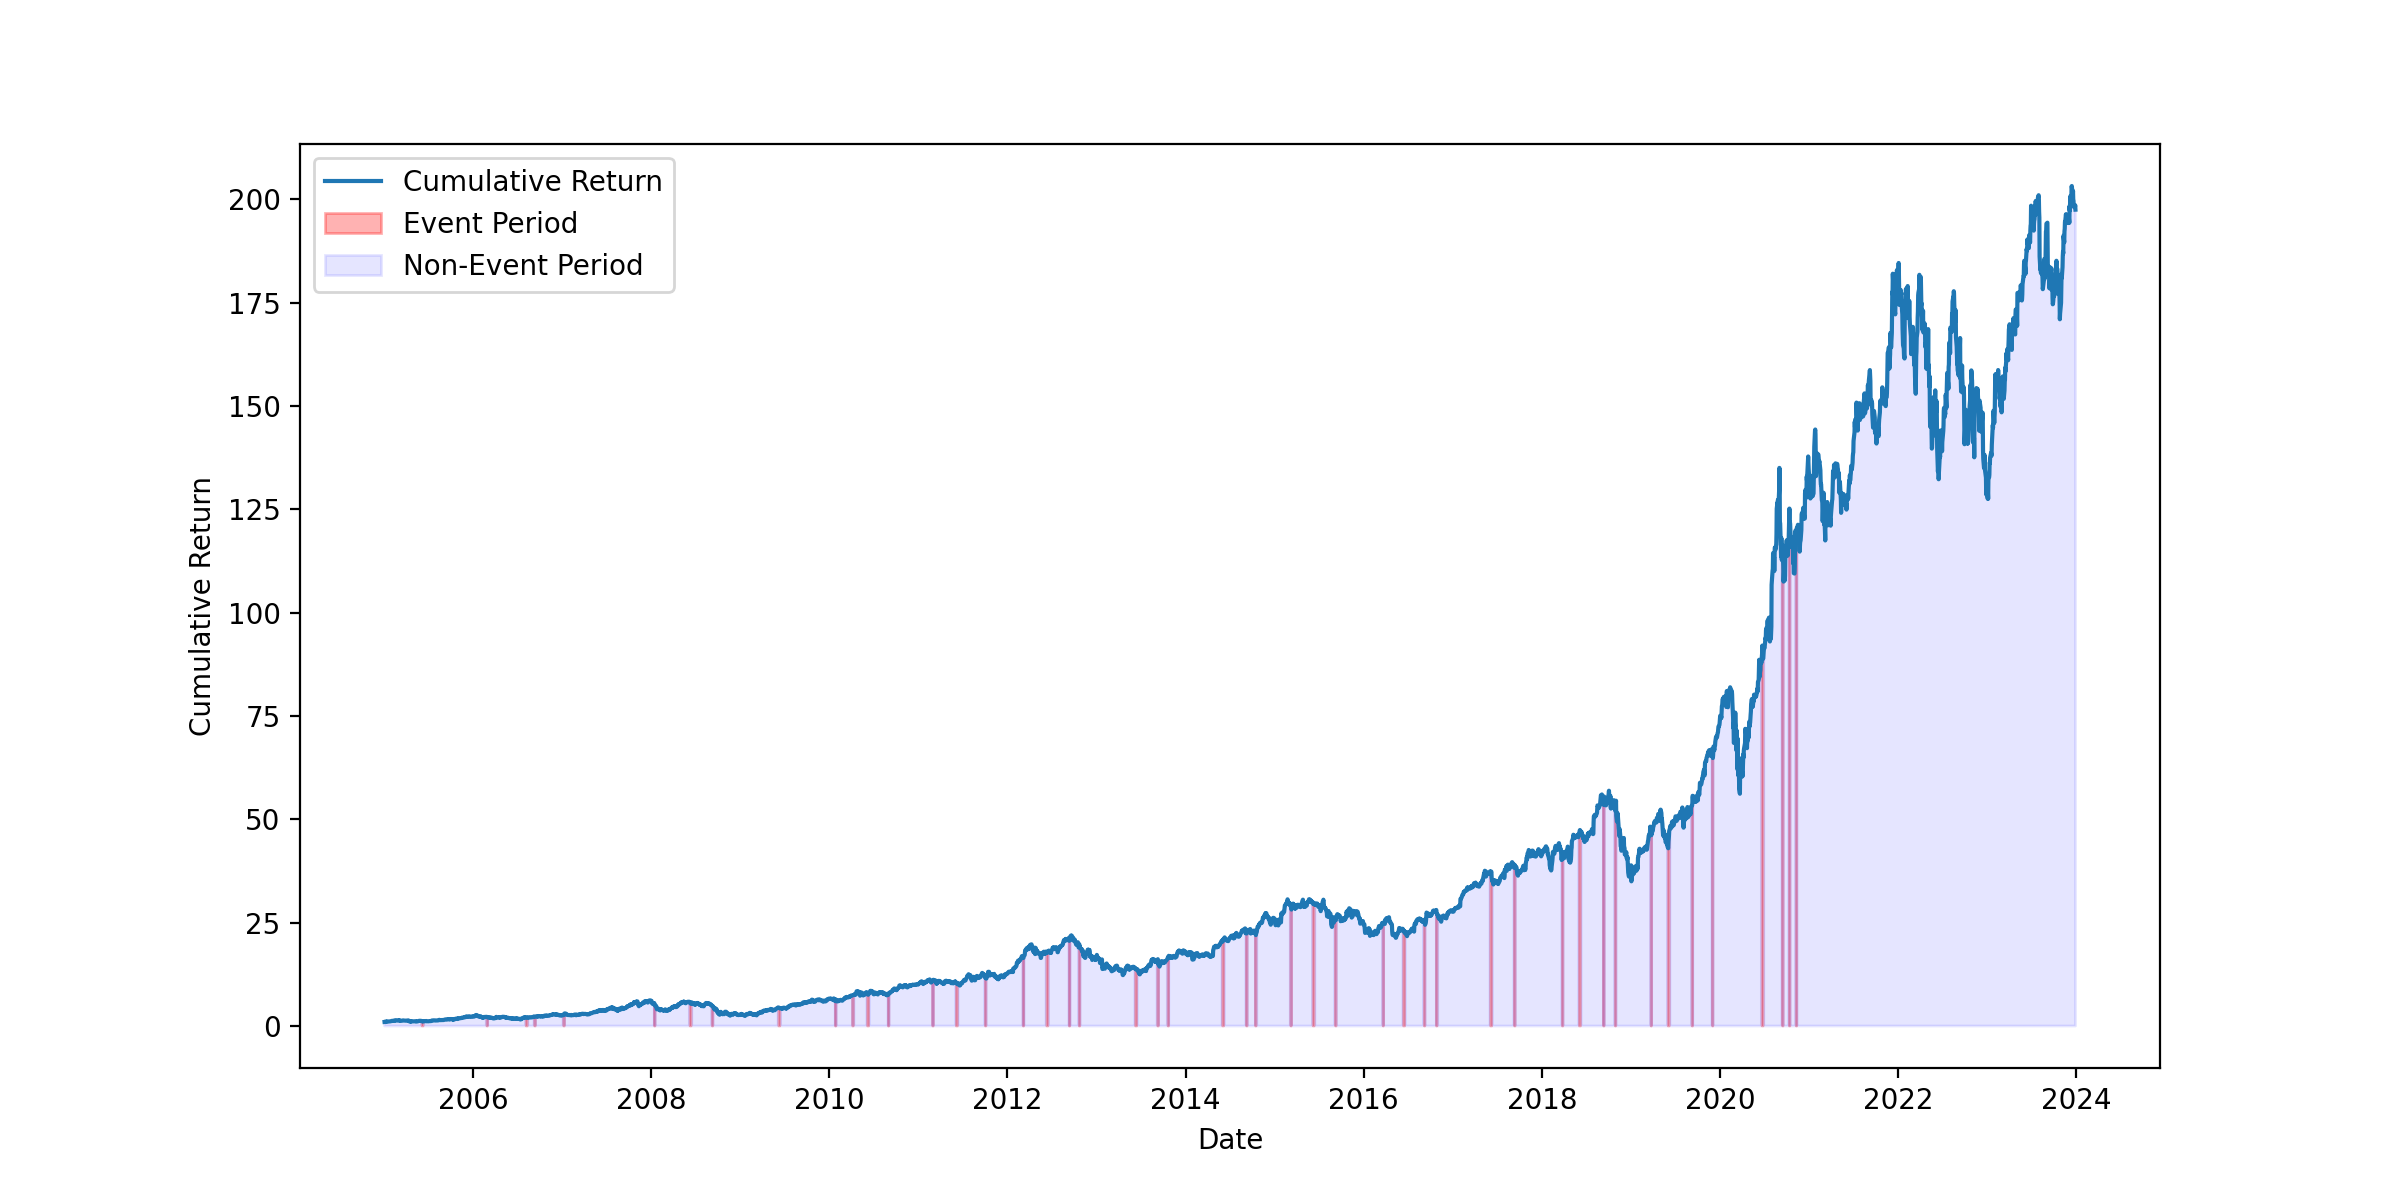

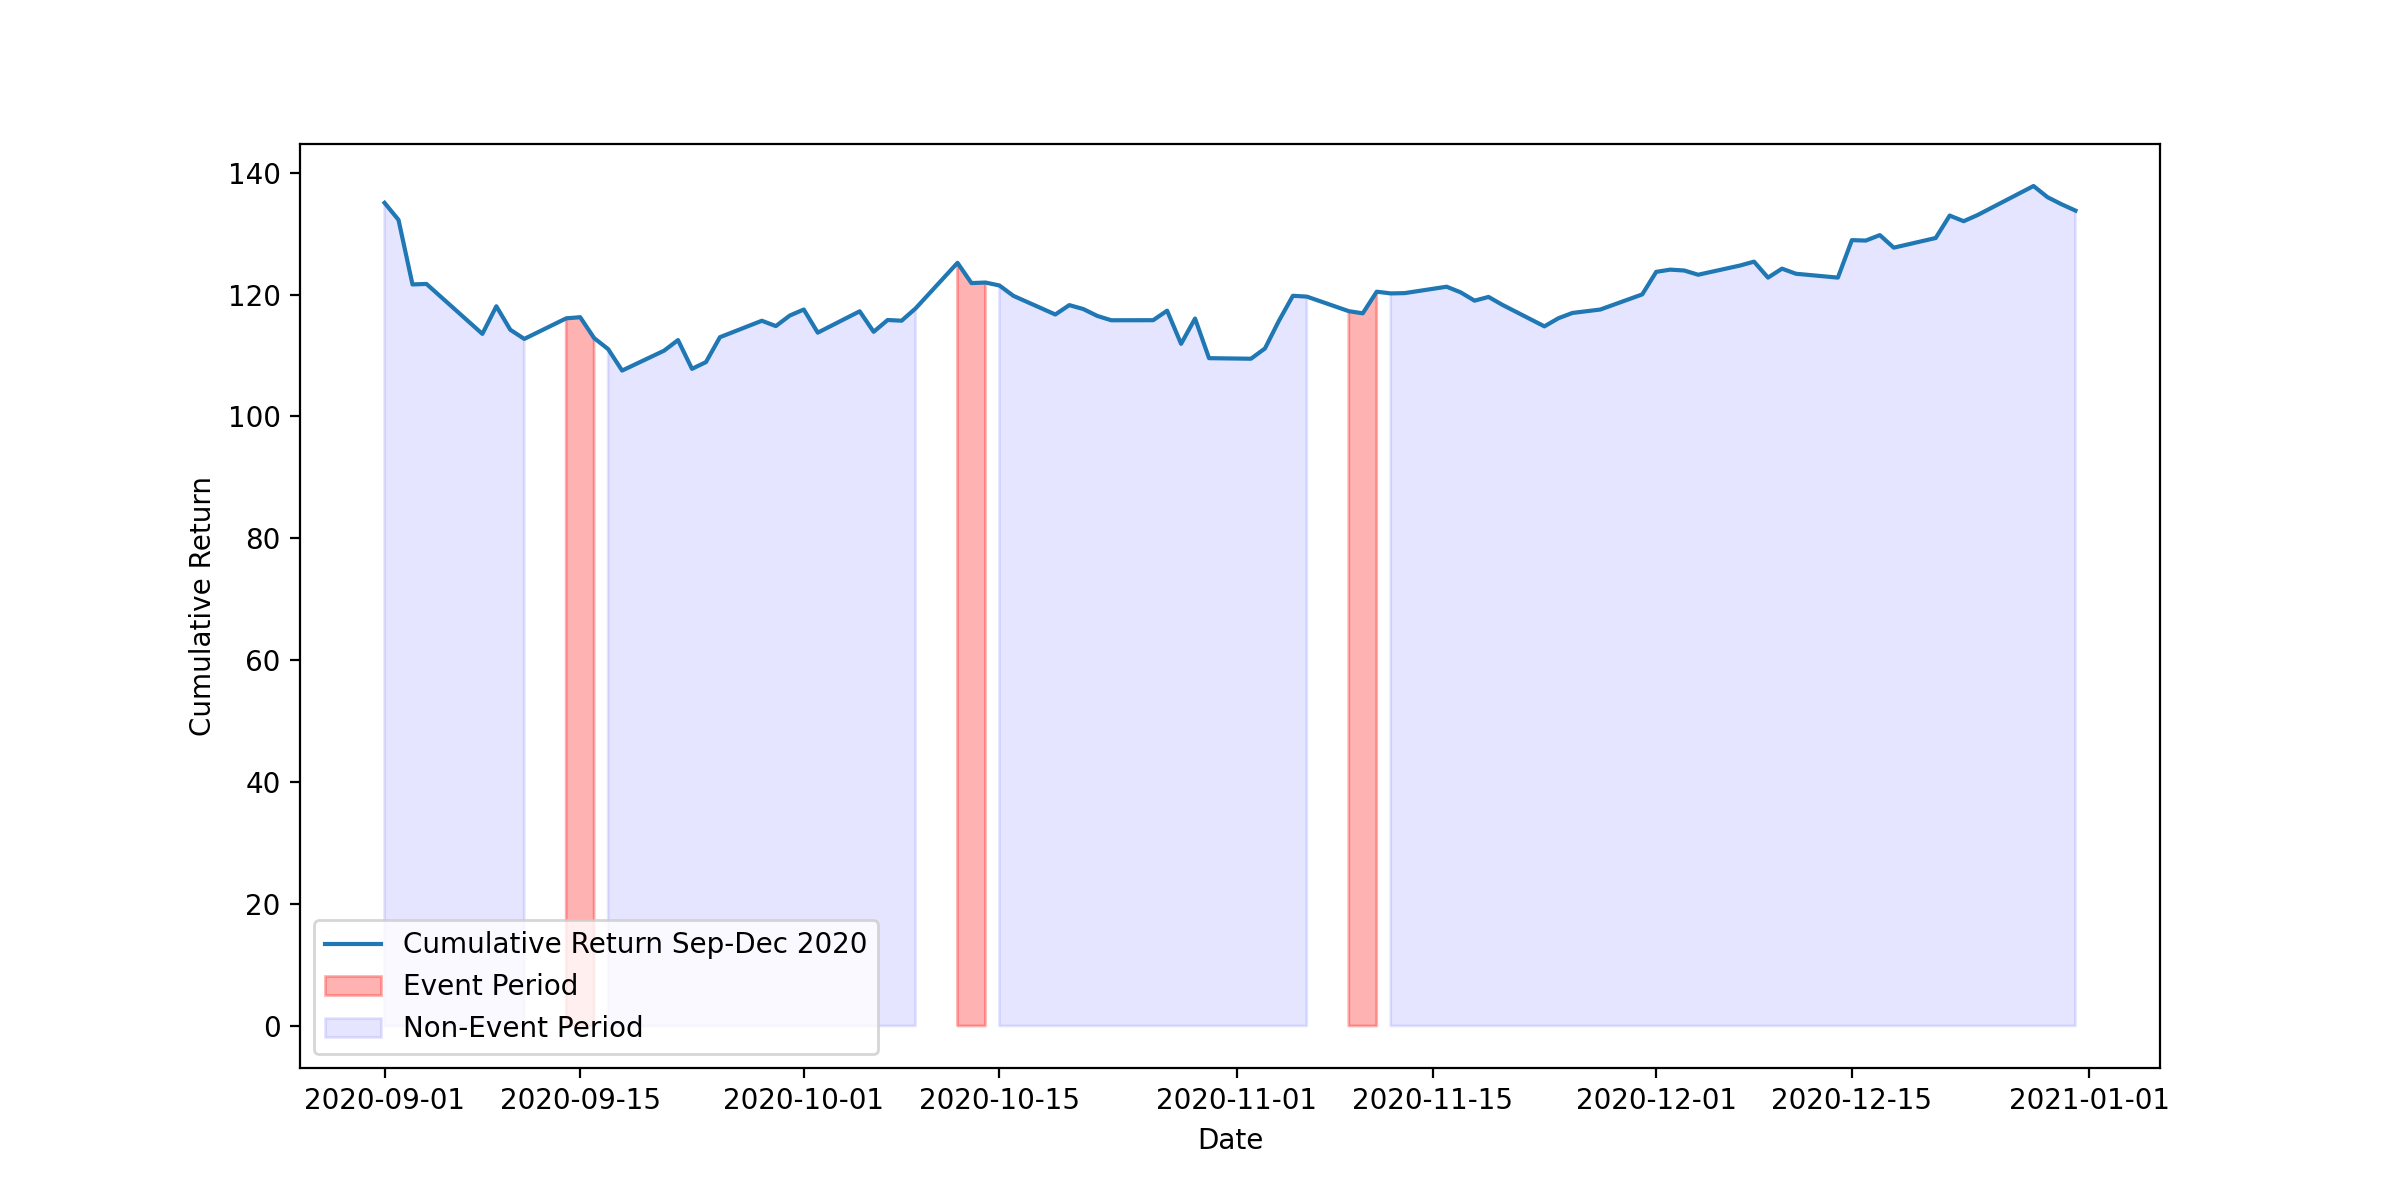

In [25]:

# 确保数据中没有缺失值
assert apple_reg_data['ret'].notna().all()

# 计算累积回报率，不使用 fillna(0)
apple_reg_data['cumret'] = (1 + apple_reg_data['ret']).cumprod()

apple_reg_data['switch'] = apple_reg_data['is_event'] != apple_reg_data['is_event'].shift(1)

# 画图：全时段累积回报
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(apple_reg_data['date'], apple_reg_data['cumret'], label='Cumulative Return')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=apple_reg_data['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(apple_reg_data['date'], 0, apple_reg_data['cumret'], where=~apple_reg_data['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()
# 画图：2020年9月至12月的累积回报
subset = apple_reg_data[(apple_reg_data['date'] >= '2020-09-01') & (apple_reg_data['date'] <= '2020-12-31')]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(subset['date'], subset['cumret'], label='Cumulative Return Sep-Dec 2020')
ax.fill_between(subset['date'], 0, subset['cumret'], where=subset['is_event'], color='red', alpha=0.3, label='Event Period')
ax.fill_between(subset['date'], 0, subset['cumret'], where=~subset['is_event'], color='blue', alpha=0.1, label='Non-Event Period')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()


## 13.3 Event studies and regulation

#### Zhang (2007) 的研究通过检查与萨班斯-奥克斯利法案（SOX）相关的立法事件对市场的反应来探究该法案的经济后果。他发现在关键的SOX事件周围，美国市场的累积加权（等权重）原始回报分别达到了-15.35%（-12.53%）。这表明这些事件在法案通过的背景下对市场产生了显著的负面影响。
#### 在类似的研究中，如果要使用CRSP（证券价格研究中心）提供的美国市场回报数据，研究人员通常会从数据库中提取相关的历史数据。这些数据可能包括市场的每日或月度价值加权回报（vwretd）和等权重回报（ewretd），这取决于所使用的具体分析方法。这些数据用来计算和分析在特定立法或其他类型事件周围市场的累积回报，帮助评估这些事件对整体市场价值的影响。

In [26]:
dsi_local = dsi[['date', 'vwretd', 'ewretd']]
dsi_local 

,date,vwretd,ewretd
0,1925-12-31,NaN,NaN
1,1926-01-02,0.005689,0.009516
2,1926-01-04,0.000706,0.005780
3,1926-01-05,-0.004821,-0.001927
4,1926-01-06,-0.000423,0.001182
...,...,...,...
25794,2023-12-22,0.002440,0.007676
25795,2023-12-26,0.005218,0.009674
25796,2023-12-27,0.001995,0.005276
25797,2023-12-28,-0.000108,0.002042


#### Zhang (2007) 在其研究中，针对“关键的SOX事件”（下文有定义）进行了一些分析，发现“在不同的规格下，估计的美国累积异常回报在-3.76%至-8.21%之间，并且都具有统计学意义。” 这里的“所有”指的是针对每一种加权回报（价值加权和等权重）以及使用两种模型的异常回报。为了方便起见，我们聚焦于一种模型，该模型测量相对于“市场模型”未解释部分的异常回报，其中市场由未在美国上市的加拿大股票组成，并省略了对第二个模型的分析，该模型将几个非美国投资组合的回报混合作为基准。为此，我们从Compustat的指数数据（comp.idx_daily）中收集了2001年和2002年多伦多综合指数（gvkeyx ==“000193”）的回报数据，并将此数据集与我们本地的crsp.dsi合并。

In [27]:
can_rets = idx_daily[idx_daily['gvkeyx'] == "000193"]
can_rets = can_rets.assign(ret_can=lambda x: np.where(x['prccd'].shift() > 0, x['prccd'] / x['prccd'].shift() - 1, np.nan))
can_rets = can_rets[(can_rets['datadate'] >= "2000-01-01") & (can_rets['datadate'] <= "2002-12-31")]
can_rets.rename(columns={'datadate': 'date'}, inplace=True)
can_rets = can_rets[['date', 'ret_can']]
can_rets

,date,ret_can
3782,2000-01-04,-0.025096
3783,2000-01-06,-0.010756
3784,2000-01-07,0.038843
3785,2000-01-10,0.020538
3786,2000-01-11,-0.018586
...,...,...
4519,2002-12-23,0.010589
4520,2002-12-24,-0.002834
4521,2002-12-27,-0.001755
4522,2002-12-30,0.003316


#### 我们收集了2001年12月28日之前的100天的回报数据，因为Zhang (2007) 中的分析是“使用2001年12月28日前100天的日回报数据估计的”。

In [28]:
reg_data = pd.merge(dsi_local, can_rets, on='date')
reg_data = reg_data[reg_data['date'] < "2001-12-28"]
reg_data = reg_data.nlargest(100, 'date')  # 使用最近的100个数据点
reg_data 

,date,vwretd,ewretd,ret_can
477,2001-12-27,0.006924,0.008020,0.013209
476,2001-12-24,0.000228,0.003541,0.003427
475,2001-12-21,0.006047,0.010195,0.009991
474,2001-12-20,-0.009356,-0.008644,-0.006121
473,2001-12-19,0.003645,-0.002733,-0.011242
...,...,...,...,...
382,2001-07-31,0.004891,0.003217,0.006330
381,2001-07-30,-0.001179,-0.001137,-0.005264
380,2001-07-27,0.003303,0.003519,0.010514
379,2001-07-26,0.011500,0.007670,-0.002763


#### 我们随后对等权和加权市场回报模型与加拿大回报进行了拟合。

In [29]:
# 线性回归模型
# 加权市场回报模型
fm_vw = ols('vwretd ~ ret_can', data=reg_data).fit()
print("Value-Weighted Returns Regression Results:")
print(fm_vw.summary())
# 等权市场回报模型
fm_ew = ols('ewretd ~ ret_can', data=reg_data).fit()
print("\nEqual-Weighted Returns Regression Results:")
print(fm_ew.summary())

Value-Weighted Returns Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 vwretd   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           4.41e-20
Time:                        19:46:51   Log-Likelihood:                 337.27
No. Observations:                 100   AIC:                            -670.5
Df Residuals:                      98   BIC:                            -665.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

#### 接下来，我们使用这些模型计算所有观察值的超额回报。

In [30]:
dsi_merged = pd.merge(dsi_local, can_rets, on='date', how='inner')
# 计算调整后的回报
# 使用statsmodels的模型进行预测
dsi_merged['abret_vw'] = dsi_merged['vwretd'] - fm_vw.predict(dsi_merged)
dsi_merged['abret_ew'] = dsi_merged['ewretd'] - fm_ew.predict(dsi_merged)

# 移除不再需要的列
dsi_merged = dsi_merged.drop(columns=['ret_can'])
dsi_merged 

,date,vwretd,ewretd,abret_vw,abret_ew
0,2000-01-04,-0.039652,-0.017465,-0.012828,0.003531
1,2000-01-06,-0.007391,0.004504,0.004480,0.013373
2,2000-01-07,0.032516,0.017008,-0.007335,-0.016070
3,2000-01-10,0.018608,0.015333,-0.002154,-0.002264
4,2000-01-11,-0.016941,-0.006079,0.003095,0.009412
...,...,...,...,...,...
721,2002-12-23,0.002633,0.001974,-0.007755,-0.007209
722,2002-12-24,-0.004790,0.001012,-0.001180,0.003181
723,2002-12-27,-0.015051,-0.005237,-0.012567,-0.003981
724,2002-12-30,0.003474,-0.003508,0.000670,-0.006540


#### 根据《张（2007）》中的表2，似乎计算出的每日回报标准差约为1.2%。这个计算的确切依据不太清楚，但类似的分析是“使用2001年12月28日前的100天的每日回报数据估计的”（《张，2007》，第88页），因此我们基于这个基础计算每日波动率，使用以下计算得出数值为1.28%。

In [31]:
# 筛选日期小于 "2001-12-28"
filtered_data = dsi_local[dsi_local['date'] < "2001-12-28"]

# 按日期排序并选取最新的100条数据
top_data = filtered_data.sort_values(by='date', ascending=False).head(100)

# 计算 vwretd 列的标准差
sd_ret = np.std(top_data['vwretd'], ddof=1)  # ddof=1 用于样本标准差的计算

# 输出结果
print("Standard Deviation of vwretd:", sd_ret)

Standard Deviation of vwretd: 0.012800358189160492


In [32]:
zhang_2007_windows = pd.read_csv("C:/Users/ZHAO LVYUJIA/04_event_study/zhang_2007_windows.csv")
zhang_2007_windows 

,event,beg_date,end_date
0,1,2002-01-15,2002-01-18
1,2,2002-02-01,2002-02-04
2,3,2002-02-11,2002-02-14
3,4,2002-02-27,2002-03-01
4,5,2002-03-06,2002-03-08
5,6,2002-03-25,2002-03-27
6,7,2002-04-11,2002-04-12
7,8,2002-04-16,2002-04-17
8,9,2002-04-24,2002-04-26
9,10,2002-05-07,2002-05-09


#### 我们可以将zhang_2007_windows、事件窗口日期与来自dsi_local的回报数据结合起来，为每个事件窗口计算累积回报。按照《张（2007）》的做法，我们可以通过将每个窗口中的每日回报波动率缩放到每个事件的交易日数量的平方根来估计标准误差，以计算每个事件的 t-统计量。我们使用残差的标准差来估计异常回报模型的每日波动率。








In [34]:
# 确保日期格式正确
zhang_2007_windows['beg_date'] = pd.to_datetime(zhang_2007_windows['beg_date'])
zhang_2007_windows['end_date'] = pd.to_datetime(zhang_2007_windows['end_date'])
dsi_merged['date'] = pd.to_datetime(dsi_merged['date'])

# 使用merge_asof进行更有效的时间序列数据合并
zhang_2007_rets = pd.merge_asof(dsi_merged.sort_values('date'), zhang_2007_windows.sort_values('beg_date'),
                                left_on='date', right_on='beg_date', direction='forward', suffixes=('', '_event'))
zhang_2007_rets = zhang_2007_rets[(zhang_2007_rets['date'] <= zhang_2007_rets['end_date'])]
# 按事件分组并汇总数据
grouped = zhang_2007_rets.groupby('event')
summary = grouped.agg(n_days=('date', 'count'),
                      vwret=('vwretd', 'sum'),
                      ewret=('ewretd', 'sum'),
                      abret_vw=('abret_vw', 'sum'),
                      abret_ew=('abret_ew', 'sum')).reset_index()

# 计算T统计量
summary['vw_t_stat'] = summary['vwret'] / (np.sqrt(summary['n_days']) * sd_ret)
summary['ew_t_stat'] = summary['ewret'] / (np.sqrt(summary['n_days']) * sd_ret)
summary['abret_vw_t_stat'] = summary['abret_vw'] / (np.sqrt(summary['n_days']) * np.std(fm_vw.resid, ddof=1))
summary['abret_ew_t_stat'] = summary['abret_ew'] / (np.sqrt(summary['n_days']) * np.std(fm_ew.resid, ddof=1))

print(summary)


    event  n_days     vwret     ewret  abret_vw  abret_ew  vw_t_stat  \
0     1.0     490 -0.116029  0.355470  0.050682  0.118929  -0.409493   
1     2.0      12 -0.018446 -0.004609 -0.018067 -0.013405  -0.415996   
2     3.0       6 -0.010227 -0.020137  0.005041 -0.012306  -0.326175   
3     4.0      10  0.009055 -0.002432  0.013069 -0.006763   0.223700   
4     5.0       5  0.048500  0.041663  0.011387  0.007771   1.694473   
5     6.0      13 -0.021022  0.019867  0.011817  0.036636  -0.455491   
6     7.0      12 -0.018935  0.004222 -0.003975  0.007250  -0.427024   
7     8.0       3  0.024193  0.026678  0.005509  0.009249   1.091207   
8     9.0       6 -0.028870 -0.006099 -0.008384  0.005963  -0.920765   
9    10.0       9 -0.037014 -0.025358 -0.010944 -0.011043  -0.963879   
10   11.0      22 -0.006121 -0.021610  0.020019 -0.017101  -0.101950   
11   12.0       6  0.004614 -0.005520  0.026092  0.007347   0.147157   
12   13.0       5 -0.056665 -0.032997 -0.023880 -0.010202  -1.97

In [35]:
# 获取正态分布的95%临界值（双尾测试）
critical_value = norm.ppf(1 - 0.05 / 2)

# 筛选显著的结果
significant_results = summary[abs(summary['vw_t_stat']) > critical_value]
significant_results
# 对 significant_results 进行汇总
zhang_2007_res = significant_results.agg({
    'vwret': 'sum',
    'ewret': 'sum',
    'abret_vw': 'sum',
    'abret_ew': 'sum',
    'n_days': 'sum'
})

# 计算总体T统计量
zhang_2007_res['vw_t'] = zhang_2007_res['vwret'] / (np.sqrt(zhang_2007_res['n_days']) * sd_ret)
zhang_2007_res['ew_t'] = zhang_2007_res['ewret'] / (np.sqrt(zhang_2007_res['n_days']) * sd_ret)
zhang_2007_res['abret_vw_t'] = zhang_2007_res['abret_vw'] / (np.sqrt(zhang_2007_res['n_days']) * np.std(fm_vw.resid, ddof=1))
zhang_2007_res['abret_ew_t'] = zhang_2007_res['abret_ew'] / (np.sqrt(zhang_2007_res['n_days']) * np.std(fm_ew.resid, ddof=1))


In [36]:
zhang_2007_res

vwret         -0.114054
ewret         -0.071950
abret_vw      -0.015726
abret_ew       0.000206
n_days        10.000000
vw_t          -2.817659
ew_t          -1.777496
abret_vw_t    -0.596227
abret_ew_t     0.009243
dtype: float64

#### 在随后的分析中，《张（2007）》关注“重要的SOX事件”，这些事件似乎是在双尾检验的10%水平上具有“统计显著性”的事件，并在表1的D面板（2007年，第91-92页）报告结果。我们复制了此程序的关键要素，我们的结果与《张（2007）》中报告的“CAR2”大致相符。
#### 我们估计了四个“重要的SOX事件”的累积原始加权回报率为（统计值），与《张（2007）》中报告的值（统计值为）非常接近。然而，我们对四个“重要的SOX事件”的累积异常加权回报率的估计值为（统计值），这比《张（2007）》中报告的值（统计值为）更接近零，后者是在表1的D面板中报告的八个值中唯一在传统水平（双尾检验中的5%）上具有统计显著性的值。





